# Purpose
- We will show that the sample means of many random variables from different distributions all converge to be normally distributed with a large enough sample size
- This only holds true if the random variables used to calculate the mean:
  - have finite expectation (sample mean) and variance
  - are independent and identically distributed

The central limit theorem for sums poses that:
- If you keep drawing larger and larger samples and taking their sums, the sums form their own normal distribution (the sampling distribution), which approaches a normal distribution as the sample size increases
- The normal distribution has a mean equal to the original mean multiplied by the sample size and a standard deviation equal to the original standard deviation multiplied by the square root of the sample size

$\sum{X} \sim N(n \cdot \mu_X, \sqrt{n} \cdot \sigma_X)$

where:
- $\mu_X$ = the mean of Χ
- $\sigma_X$ = the standard deviation of X
- n = the sample size (the number of values summed)

# Import packages

In [1]:
using Pkg
Pkg.status()

Status `D:\Utilizador HDD\Google Drive\02-Projects\Notebooks-Research\Statistics\Project.toml`
  [a93c6f00] DataFrames v1.6.1
  [31c24e10] Distributions v0.25.108
  [09f84164] HypothesisTests v0.11.0
  [91a5bcdd] Plots v1.40.4
  [f3b207a7] StatsPlots v0.15.7


In [2]:
using Distributions
using StatsPlots
using DataFrames
using Printf

# Simulation - Poisson random variable

- Note that the poisson has mean $\lambda$ and variance ($\sigma^2$) also $\lambda$, so those are the values input as parameters for the normal distribution
- Don't forget that the Normal distribution of the sums takes parameters: $\sigma = \sqrt(n) \cdot \sigma$, where $\lambda = \sigma^2$, and so $\sigma = \sqrt(\lambda)$

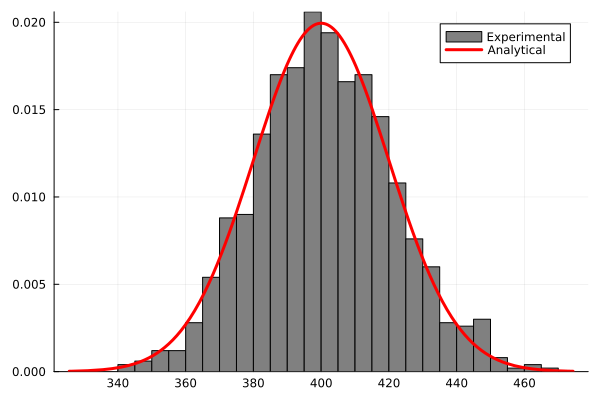

In [9]:
# simulation parameters
n = 100
n_iterations = 1000
λ = 4

# IID dataset of `n` random variables
model = Poisson(λ)
data = [sum(rand(model, n)) for _ in 1:n_iterations]

# calculate the parameters for the (putative - we'll check it now) normal distribution of the sums
μ = n * λ
σ = √(n) * √(λ)  # Watch out: Distributions.jl takes σ instead of σ^2 in the model

# plot both the simulated values and the distribution to check
histogram(data, label="Experimental", bins=50, normalize=:pdf, color=:gray)
plot!(Normal(μ, σ), label="Analytical", normalize=:pdf, lw=3, color=:red)

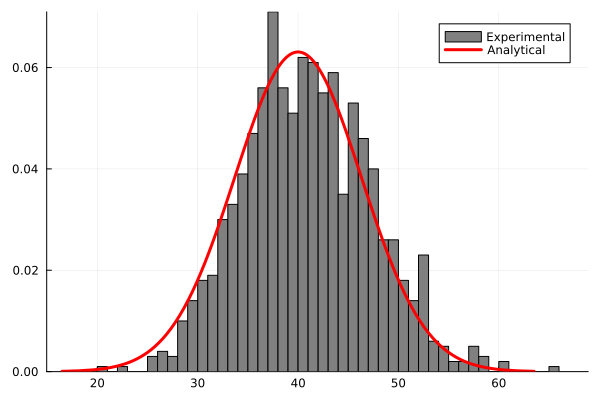

In [10]:
# simulation parameters
n = 10
n_iterations = 1000
λ = 4

# IID dataset of `n` random variables
model = Poisson(λ)
data = [sum(rand(model, n)) for _ in 1:n_iterations]

# calculate the parameters for the (putative - we'll check it now) normal distribution of the sums
μ = n * λ
σ = √(n) * √(λ)  # Watch out: Distributions.jl takes σ instead of σ^2 in the model

# plot both the simulated values and the distribution to check
histogram(data, label="Experimental", bins=50, normalize=:pdf, color=:gray)
plot!(Normal(μ, σ), label="Analytical", normalize=:pdf, lw=3, color=:red)

- Even smaller sample sizes produce a sum that follows the theorem

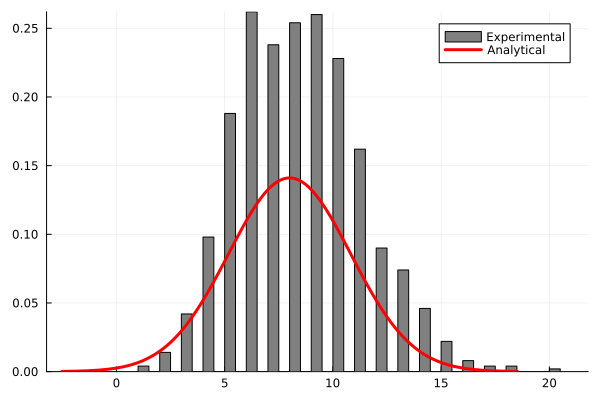

In [11]:
# simulation parameters
n = 2
n_iterations = 1000
λ = 4

# IID dataset of `n` random variables
model = Poisson(λ)
data = [sum(rand(model, n)) for _ in 1:n_iterations]

# calculate the parameters for the (putative - we'll check it now) normal distribution of the sums
μ = n * λ
σ = √(n) * √(λ)  # Watch out: Distributions.jl takes σ instead of σ^2 in the model

# plot both the simulated values and the distribution to check
histogram(data, label="Experimental", bins=50, normalize=:pdf, color=:gray)
plot!(Normal(μ, σ), label="Analytical", normalize=:pdf, lw=3, color=:red)

- Sample sizes as small as 2 or 3, for example, produce bell curves that do not follow normality, mostly because the sum still assumes a discrete distribution (as in, not all values will be generated from a sum of 2 values)

# Simulation - Binomial random variable

- Note that the Binomial has mean $np$ and variance ($\sigma^2$) = $np(1- p)$, so those are the values input as parameters for the normal distribution
- Don't forget that the assymptotic Normal distribution of the mean takes parameters: $\sigma^2 = \frac{\sigma^2}{n}$

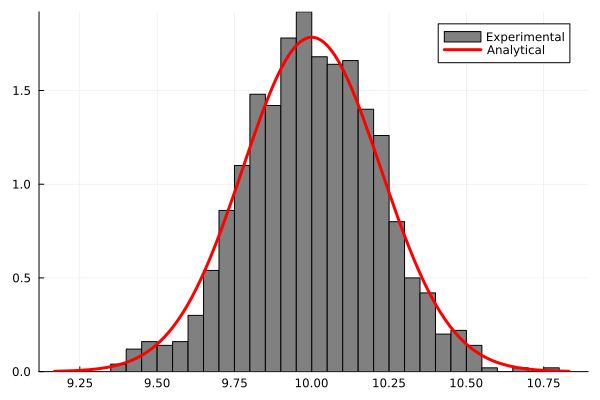

In [5]:
# simulation parameters
sample_size = 100
n_iterations = 1000
n = 20
p = 0.5

# IID dataset of `sample_size` random variables
model = Binomial(n, p)
data = [mean(rand(model, sample_size)) for _ in 1:n_iterations]

# calculate the parameters for the (putative - we'll check it now) asymptotic normal distribution of the mean
μ = n*p
variance = n * p * (1- p)
σ = √(variance / sample_size)  # Distributions.jl takes σ instead of σ^2 in the model

# plot both the simulated values and the distribution to check
histogram(data, label="Experimental", bins=50, normalize=:pdf, color=:gray)
plot!(Normal(μ, σ), label="Analytical", normalize=:pdf, lw=3, color=:red)

# Simulation - Exponential random variable

- Note that the Exponential has mean $\frac{1}{\lambda}$ and variance ($\sigma^2$) = $\frac{1}{\lambda^2}$, where $\lambda$ is the rate, or inverse of the scale. So those are the values input as parameters for the normal distribution
- Don't forget that the assymptotic Normal distribution of the mean takes parameters: $\sigma^2 = \frac{\sigma^2}{n}$
- Note also that Distributions.jl takes $\theta$ (the scale) instead of the rate, so we must calculate accordingly

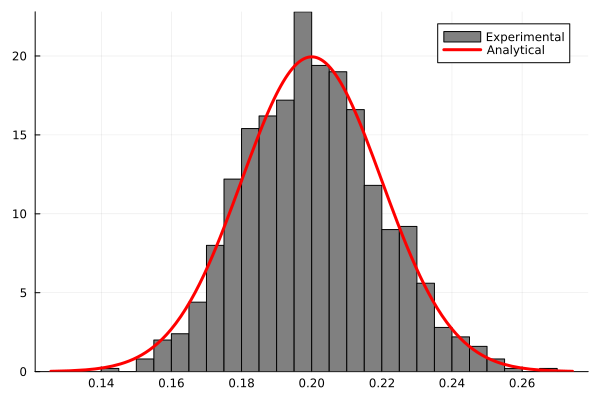

In [6]:
# simulation parameters
sample_size = 100
n_iterations = 1000

λ = 5  # λ is the rate
θ = 1 / λ  # θ is the scale, or inverse of the rate λ

# IID dataset of `sample_size` random variables
model = Exponential(θ)
data = [mean(rand(model, sample_size)) for _ in 1:n_iterations]

# calculate the parameters for the (putative - we'll check it now) asymptotic normal distribution of the mean
μ = 1 / λ
variance = 1 / (λ^2)
σ = √(variance / sample_size)  # Distributions.jl takes σ instead of σ^2 in the model

# plot both the simulated values and the distribution to check
histogram(data, label="Experimental", bins=50, normalize=:pdf, color=:gray)
plot!(Normal(μ, σ), label="Analytical", normalize=:pdf, lw=3, color=:red)

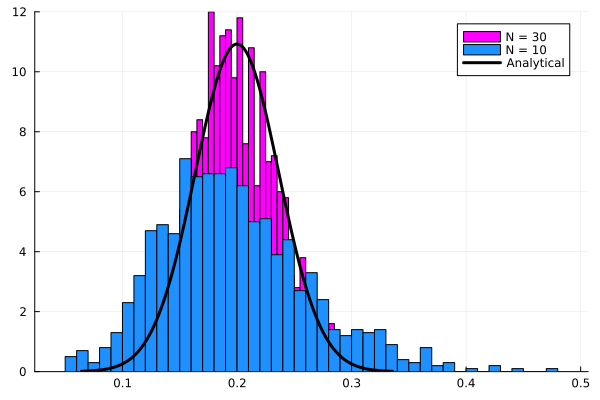

In [53]:
# simulation parameters
sample_size = 30
sample_size_2 = 10
n_iterations = 1000

λ = 5  # λ is the rate
θ = 1 / λ  # θ is the scale, or inverse of the rate λ

# IID dataset of `sample_size` random variables
model = Exponential(θ)
data = [mean(rand(model, sample_size)) for _ in 1:n_iterations]
data_10 = [mean(rand(model, sample_size_2)) for _ in 1:n_iterations]

# calculate the parameters for the (putative - we'll check it now) asymptotic normal distribution of the mean
μ = 1 / λ
variance = 1 / (λ^2)
σ = √(variance / sample_size)  # Distributions.jl takes σ instead of σ^2 in the model

# plot both the simulated values and the distribution to check
histogram(data, label=@sprintf("N = %s", sample_size), bins=50, normalize=:pdf, color=:magenta)
histogram!(data_10, label=@sprintf("N = %s", sample_size_2), bins=50, normalize=:pdf, color=:dodgerblue)
plot!(Normal(μ, σ), label="Analytical", normalize=:pdf, lw=3, color=:black)

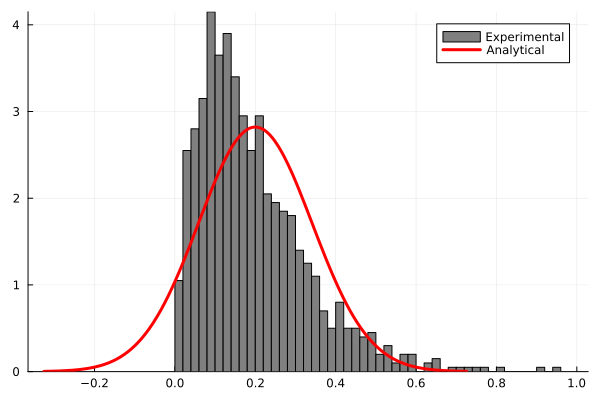

In [35]:
# simulation parameters
sample_size = 2
n_iterations = 1000

λ = 5  # λ is the rate
θ = 1 / λ  # θ is the scale, or inverse of the rate λ

# IID dataset of `sample_size` random variables
model = Exponential(θ)
data = [mean(rand(model, sample_size)) for _ in 1:n_iterations]

# calculate the parameters for the (putative - we'll check it now) asymptotic normal distribution of the mean
μ = 1 / λ
variance = 1 / (λ^2)
σ = √(variance / sample_size)  # Distributions.jl takes σ instead of σ^2 in the model

# plot both the simulated values and the distribution to check
histogram(data, label="Experimental", bins=50, normalize=:pdf, color=:gray)
plot!(Normal(μ, σ), label="Analytical", normalize=:pdf, lw=3, color=:red)

- Sample sizes as small as 1, 2, 3, for example, produce curves that do not follow normality have a shape more similar to an exponential, mostly because the mean values are still shifted to the left and the asymptotic distribution variance is still so high that assumes negative values, that can't be achieved from an exponential

# General notes:
- With this, we can see that the central limit theorem holds true for both discrete and continuous random variables
- In general, the assumption holds true at relatively small values of sample size (n) used to calculate the mean
  - The common value of 30 seems to be good enough
- With very small n values, the theorem does not hold. Here, we see "intermediate" distributions of the mean that keep some properties of the original random variable distribution